In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('/content/drug200.xls')

In [5]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.shape

(200, 6)

In [9]:
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [10]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [14]:
df.rename(columns = { 'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace = True)
df['Sex'].replace({'M': 'Male', 'F': 'Female'},inplace = True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

In [15]:
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_2 = pd.DataFrame({'Age' : top_age.index, 'Count': top_age.values})
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [16]:
df.head(5)

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY


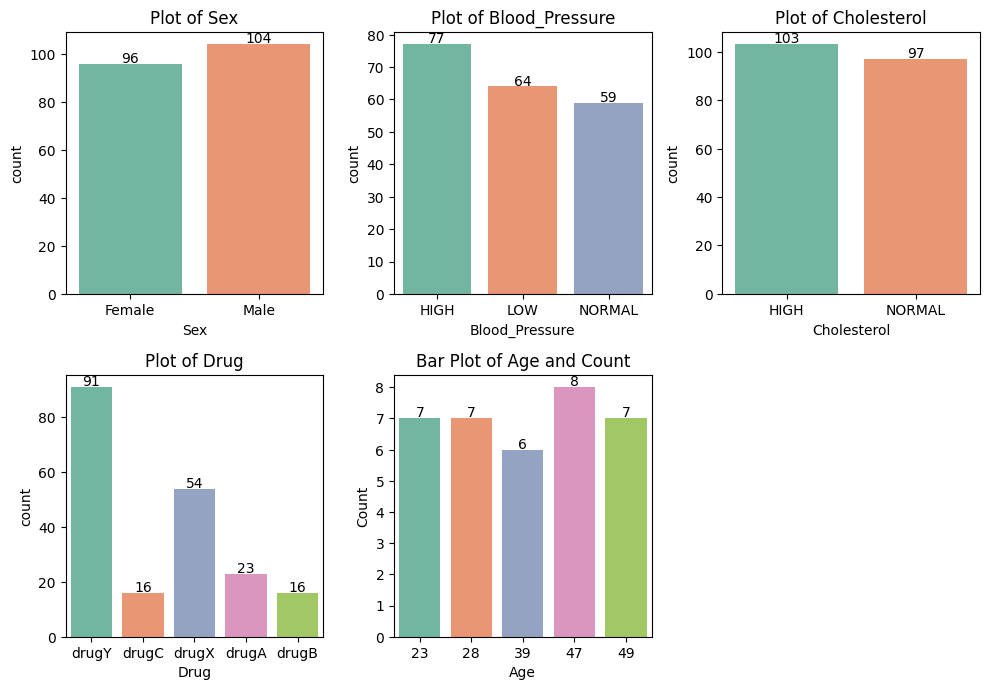

In [17]:
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')
# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_2, 'plot_type': 'bar'}
]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

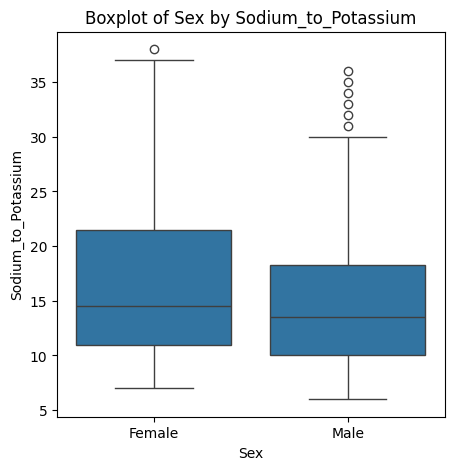

In [18]:
## Checking outiers detection through box plot.
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
## Since sex, Blood Pressure and cholesterol are all in object type we nee to encode them for better prediction.

labelled_encoder_sex = LabelEncoder()
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Sex'] = labelled_encoder_sex.fit_transform(X['Sex'])
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])
X

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,0,0,0,25
1,47,1,1,0,13
2,47,1,1,0,10
3,28,0,2,0,8
4,61,0,1,0,18
...,...,...,...,...,...
195,56,0,1,0,12
196,16,1,1,0,12
197,52,1,2,0,10
198,23,1,2,1,14


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
accuracy = dtc.score(X_test,y_test)
print('The accuaracy of this model is :', accuracy*100)

The accuaracy of this model is : 98.75


In [25]:
unique_classes

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

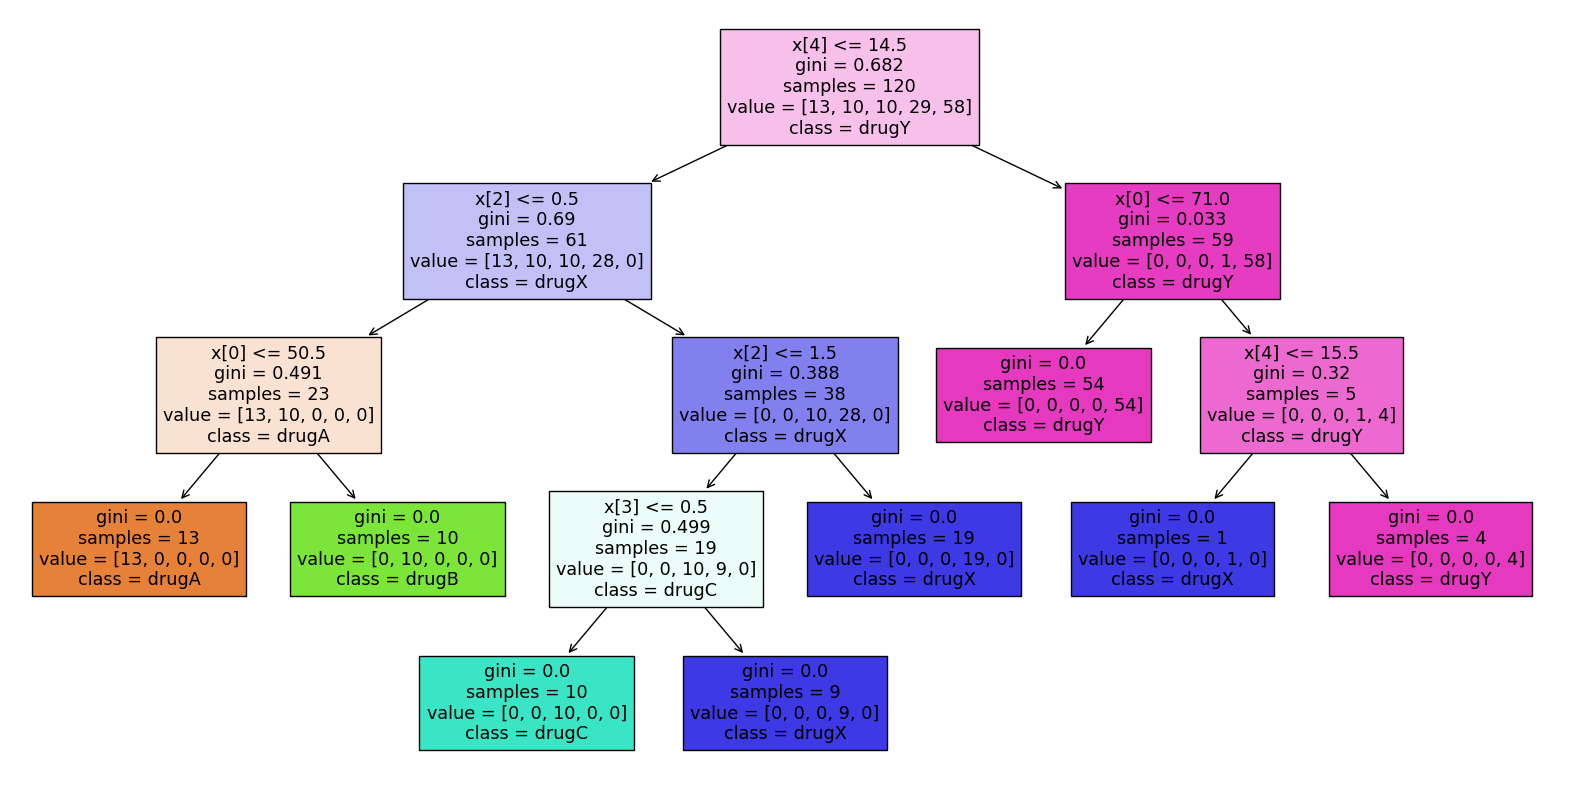

In [22]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)
plt.figure(figsize=(20,10))
plot_tree(dtc, class_names=unique_classes, filled=True)
plt.show()

In [23]:
df.sample(1)

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
82,32,Female,LOW,HIGH,10,drugC


In [24]:
## Prediction
X = np.array(['28','Female','NORMAL','HIGH', '13'])
label = LabelEncoder()
X = label.fit_transform(X)
y_pred = dtc.predict(X.reshape(1,-1))
y_pred

array(['drugX'], dtype=object)